---
# Super Bowl
---

<p>Whether or not you like football, the Super Bowl is a spectacle. There is a little something for everyone at a Super Bowl party. Drama in the form of blowouts, comebacks, and controversy for the sports fan. There are the ridiculously expensive ads, some hilarious, others gut-wrenching, thought-provoking, and weird. The half-time shows with the biggest musicians in the world, sometimes <a href="https://youtu.be/ZD1QrIe--_Y?t=14">riding giant mechanical tigers</a> or <a href="https://youtu.be/mjrdywp5nyE?t=62">leaping from the roof of the stadium</a>. It is a big show! In this notebook, I am going to find out how some of the elements of this show interact with each other. After exploring and cleaning the data a little, I am going to answer questions like:</p>
<ul>
<li>What are the most extreme game outcomes?</li>
<li>How does the game affect television viewership?</li>
<li>How have viewership, TV ratings, and ad cost evolved over time?</li>
<li>Who are the most prolific musicians in terms of halftime show performances?</li>
</ul>
<p><img src="https://assets.datacamp.com/production/project_684/img/left_shark.jpg" alt="Left Shark Steals The Show">
<em><a href="https://www.flickr.com/photos/huntleypaton/16464994135/in/photostream/">Left Shark Steals The Show</a>. Katy Perry performing at halftime of Super Bowl XLIX. Photo by Huntley Paton. Attribution-ShareAlike 2.0 Generic (CC BY-SA 2.0).</em></p>
<p>The dataset I will use was <a href="https://en.wikipedia.org/wiki/Web_scraping">scraped</a> and polished from Wikipedia. It is made up of three CSV files, one with <a href="https://en.wikipedia.org/wiki/List_of_Super_Bowl_champions">game data</a>, one with <a href="https://en.wikipedia.org/wiki/Super_Bowl_television_ratings">TV data</a>, and one with <a href="https://en.wikipedia.org/wiki/List_of_Super_Bowl_halftime_shows">halftime musician data</a> for all 52 Super Bowls through 2018.

---
## 1. Setup
---

In [1]:
# Importing libraries
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

# Setting plotting style
plt.style.use('seaborn')

# Loading the CSV data into DataFrames
super_bowls        = pd.read_csv("datasets/super_bowls.csv")
tv                 = pd.read_csv("datasets/tv.csv")
halftime_musicians = pd.read_csv("datasets/halftime_musicians.csv")

---
## 2. Taking note of dataset issues
---

In [2]:
# # Checking for issues in the datasets
# display(super_bowls.info())
# display(tv.info())
# display(halftime_musicians.info())

<p>For the Super Bowl game data, the dataset appears whole except for missing values in the backup quarterback columns (<code>qb_winner_2</code> and <code>qb_loser_2</code>), which make sense given most starting QBs in the Super Bowl (<code>qb_winner_1</code> and <code>qb_loser_1</code>) play the entire game.</p>
<p>For the TV data, the following columns have missing values and a lot of them:</p>
<ul>
<li><code>total_us_viewers</code> (amount of U.S. viewers who watched at least some part of the broadcast)</li>
<li><code>rating_18_49</code> (average % of U.S. adults 18-49 who live in a household with a TV that were watching for the entire broadcast)</li>
<li><code>share_18_49</code> (average % of U.S. adults 18-49 who live in a household with a TV <em>in use</em> that were watching for the entire broadcast)</li>
</ul>
<p>For the halftime musician data, there are missing numbers of songs performed (<code>num_songs</code>) for about a third of the performances.</p>
<p>There are a lot of potential reasons for these missing values. Was the data ever tracked? Was it lost in history? Is the research effort to make this data whole worth it? Maybe. Watching every Super Bowl halftime show to get song counts would be pretty fun. But I do not have the time to do that kind of stuff now! I will take note of where the dataset is not perfect and start uncovering some insights.</p>

---
## 3. Combined points distribution
---
<p>Let's start by looking at combined points for each Super Bowl by visualizing the distribution. Let's also pinpoint the Super Bowls with the highest and lowest scores.</p>

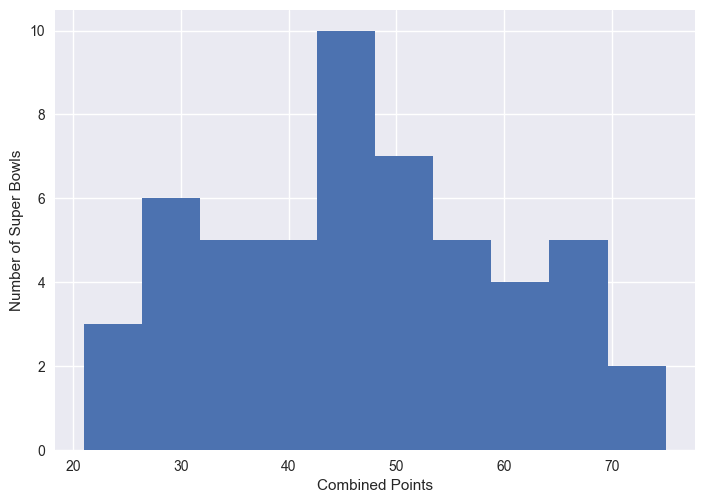

In [3]:
# Plotting a histogram of combined points
fig = plt.figure(dpi=100)
ax = fig.add_axes([.8, .8, .8, .8])
ax.hist(super_bowls["combined_pts"])
ax.set_xlabel('Combined Points')
ax.set_ylabel('Number of Super Bowls')
plt.show()

# # Displaying the Super Bowls with the highest and lowest combined scores
# display(super_bowls[super_bowls['combined_pts'] > 70])
# display(super_bowls[super_bowls['combined_pts'] < 70])

<p>Most combined scores are around 40-50 points, with the extremes being roughly equal distance away in opposite directions. Going up to the highest combined scores at 74 and 75, I find two games featuring dominant quarterback performances. One even happened recently in 2018's Super Bowl LII where Tom Brady's Patriots lost to Nick Foles' underdog Eagles 41-33 for a combined score of 74.</p>
<p>Going down to the lowest combined scores, we have Super Bowl III and VII, which featured tough defenses that dominated. We also have Super Bowl IX in New Orleans in 1975, whose 16-6 score can be attributed to inclement weather. The field was slick from overnight rain, and it was cold at 46 °F (8 °C), making it hard for the Steelers and Vikings to do much offensively. This was the second-coldest Super Bowl ever and the last to be played in inclement weather for over 30 years. The NFL realized people like points, I guess.</p>

---
## 4. Point difference distribution
---

<p>Let's take a look at point <em>difference</em> now.</p>

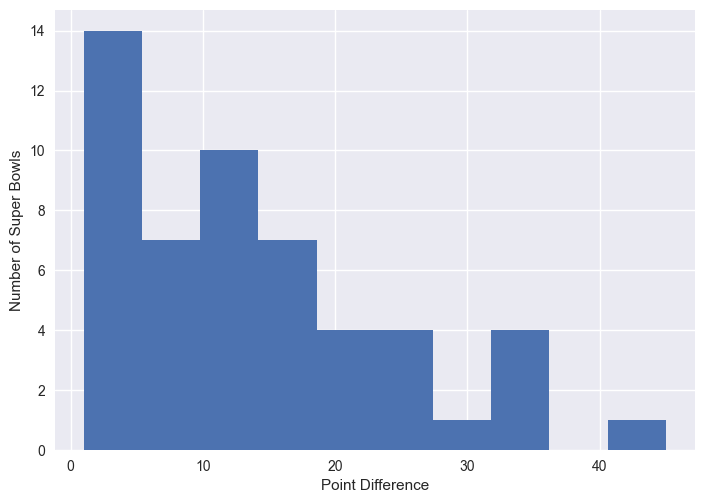

In [4]:
# Plotting a histogram of point differences
fig = plt.figure(dpi=100)
ax = fig.add_axes([.8, .8, .8, .8])
ax.hist(super_bowls.difference_pts)
ax.set_xlabel('Point Difference')
ax.set_ylabel("Number of Super Bowls")
plt.show()

# # Displaying the closest game(s) and biggest blowouts
# display(super_bowls[super_bowls.difference_pts == 1])
# display(super_bowls[super_bowls.difference_pts >= 35])

<p>The vast majority of Super Bowls are close games. Makes sense. Both teams are likely to be deserving if they have made it this far. The closest game ever was when the Buffalo Bills lost to the New York Giants by 1 point in 1991, which was best remembered for Scott Norwood's last-second missed field goal attempt that went <em><a href="https://www.youtube.com/watch?v=RPFZCGgjDSg">wide right</a></em>, kicking off four Bills Super Bowl losses in a row. Poor Scott. The biggest point discrepancy ever was 45 points where Hall of Famer Joe Montana's led the San Francisco 49ers to victory in 1990, one year before the closest game ever.</p>

---
## 5. Do blowouts translate to lost viewers?
---

<p>Let's combine the game data and TV to see if this is a universal phenomenon. Do large point differences translate to lost viewers? I will plot <a href="https://en.wikipedia.org/wiki/Nielsen_ratings">household share</a> <em>(average percentage of U.S. households with a TV in use that were watching for the entire broadcast)</em> vs. point difference to find out.</p>

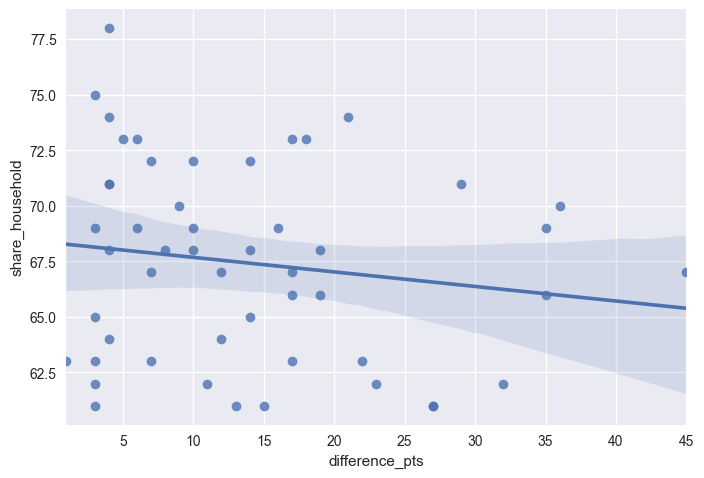

In [5]:
# Joining game and TV data, filtering out SB I because it was split over two networks
games_tv = pd.merge(tv[tv['super_bowl'] > 1], super_bowls, on='super_bowl')

# Creating a scatter plot with a linear regression model fit
fig = plt.figure(dpi=100)
sns.regplot(x="difference_pts", y="share_household", data=games_tv)
plt.show()

<p>The downward sloping regression line and the 95% confidence interval for that regression <em>suggest</em> that bailing on the game if it is a blowout is common. Though it matches my intuition, we must take it with a grain of salt because the linear relationship in the data is weak due to our small sample size of 52 games.</p>

---
## 6. Viewership and the ad industry over time
---

<p>Regardless of the score though, I bet most people stick it out for the halftime show, which is good news for the TV networks and advertisers. A 30-second spot costs a pretty <a href="https://www.businessinsider.com/super-bowl-commercials-cost-more-than-eagles-quarterback-earns-2018-1">$5 million</a> now, but has it always been that way? And how have number of viewers and household ratings trended alongside ad cost? We can find out using line plots that share a "Super Bowl" x-axis.</p>

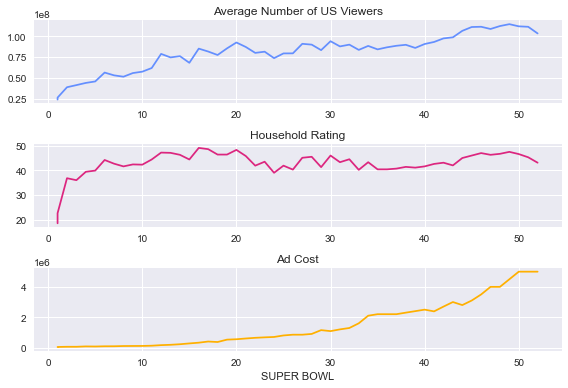

In [6]:
# Creating a figure with 3x1 subplot and activate the top subplot
plt.subplot(3, 1, 1)
plt.plot(tv.super_bowl, tv.avg_us_viewers, color="#648FFF")
plt.title('Average Number of US Viewers')

# Activating the middle subplot
plt.subplot(3, 1, 2)
plt.plot(tv.super_bowl, tv.rating_household, "#DC267F")
plt.title('Household Rating')

# Activating the bottom subplot
plt.subplot(3, 1, 3)
plt.plot(tv.super_bowl, tv.ad_cost, "#FFB000")
plt.title('Ad Cost')
plt.xlabel('SUPER BOWL')

# Improving the spacing between subplots
plt.tight_layout()

<p>We can see viewers increased before ad costs did. Maybe the networks were not very data savvy and were slow to react?</p>

---
## 7. Halftime shows weren't always this great
---

<p>Another hypothesis: maybe halftime shows were not that good in the earlier years? The modern spectacle of the Super Bowl has a lot to do with the cultural prestige of big halftime acts. I went down a YouTube rabbit hole and it turns out the old ones were not up to today's standards. Some offenders:</p>
<ul>
<li><a href="https://youtu.be/6wMXHxWO4ns?t=263">Super Bowl XXVI</a> in 1992: A Frosty The Snowman rap performed by children.</li>
<li><a href="https://www.youtube.com/watch?v=PKQTL1PYSag">Super Bowl XXIII</a> in 1989: An Elvis impersonator that did magic tricks and didn't even sing one Elvis song.</li>
<li><a href="https://youtu.be/oSXMNbK2e98?t=436">Super Bowl XXI</a> in 1987: Tap dancing ponies. (Okay, that's pretty awesome actually.)</li>
</ul>
<p>It turns out Michael Jackson's Super Bowl XXVII performance, one of the most watched events in American TV history, was when the NFL realized the value of Super Bowl airtime and decided they needed to sign big name acts from then on out. The halftime shows before MJ indeed were not that impressive, which we can see by filtering our <code>halftime_musician</code> data.</p>

In [7]:
# # Display all halftime musicians for Super Bowls up to and including Super Bowl XXVII
# halftime_musicians[halftime_musicians["super_bowl"] <= 27]

<p>Lots of marching bands. American jazz clarinetist Pete Fountain. Miss Texas 1973 playing a violin. Nothing against those performers, they are just simply not <a href="https://www.youtube.com/watch?v=suIg9kTGBVI">Beyoncé</a>. To be fair, no one is.</p>

---
## 8. Who has the most halftime show appearances?
---

<p>Let's see all of the musicians that have done more than one halftime show, including their performance counts.</p>

In [8]:
# # Count halftime show appearances for each musician and sort them from most to least
# halftime_appearances = halftime_musicians.groupby('musician').count()['super_bowl'].reset_index()
# halftime_appearances = halftime_appearances.sort_values('super_bowl', ascending=False)

# # Display musicians with more than one halftime show appearance
# halftime_appearances[halftime_appearances["super_bowl"] > 1]

<p>The world famous <a href="https://www.youtube.com/watch?v=RL_3oqpHiDg">Grambling State University Tiger Marching Band</a> takes the crown with six appearances. Beyoncé, Justin Timberlake, Nelly, and Bruno Mars are the only post-Y2K musicians with multiple appearances (two each).</p>

---
## 9. Who performed the most songs in a halftime show?
---

<p>From our previous inspections, the <code>num_songs</code> column has lots of missing values:</p>
<ul>
<li>A lot of the marching bands don't have <code>num_songs</code> entries.</li>
<li>For non-marching bands, missing data starts occurring at Super Bowl XX.</li>
</ul>
<p>Let's filter out marching bands by filtering out musicians with the word "Marching" in them and the word "Spirit" (a common naming convention for marching bands is "Spirit of [something]"). Then we'll filter for Super Bowls after Super Bowl XX to address the missing data issue, <em>then</em> let's see who has the most number of songs.</p>

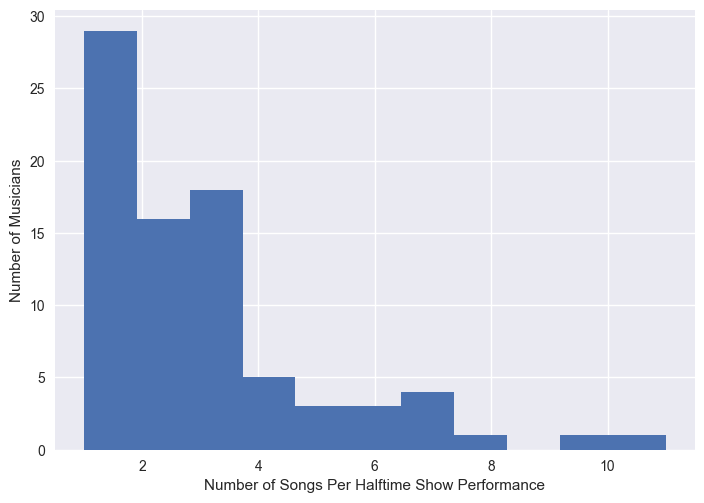

In [9]:
# Filtering out most marching bands
no_bands = halftime_musicians[~halftime_musicians.musician.str.contains('Marching')]
no_bands = no_bands[~no_bands.musician.str.contains('Spirit')]

# Plotting a histogram of number of songs per performance
most_songs = int(max(no_bands['num_songs'].values))
fig = plt.figure(dpi=100)
ax = fig.add_axes([.8, .8 , .8, .8])
ax.hist(no_bands.num_songs.dropna(), bins=most_songs)
ax.set_xlabel("Number of Songs Per Halftime Show Performance")
ax.set_ylabel('Number of Musicians')
plt.show()

# Sorting the non-band musicians by number of songs per appearance...
no_bands = no_bands.sort_values('num_songs', ascending=False)

# # ...and displaying the top 15
# display(no_bands.head(15))

<p>So, most non-band musicians do 1-3 songs per halftime show. It is important to note that the duration of the halftime show is fixed (roughly 12 minutes) so songs per performance is more a measure of how many hit songs you have. JT went off in 2018, wow. 11 songs! Diana Ross comes in second with 10 in her medley in 1996.</p>

---
## 10. Conclusion
---
<p>In this notebook, I loaded, cleaned, then explored Super Bowl game, television, and halftime show data. I visualized the distributions of combined points, point differences, and halftime show performances using histograms. I used line plots to see how ad cost increases lagged behind viewership increases. And I discovered that blowouts do appear to lead to a drop in viewers.</p>